# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### [Mehrsa Pourya]
### [95101247]

In this assignment, you will implement some important algorithms in Machine Learning only using Linalg and without using scikit-learn.


## 1.Perceptron



In this section, you will classify an binary dataset with perceptron algorithm.

###### Load data


Import data with pandas library.
First 9 columns are your training features. Name them 'X'. 10th column is label. Name it Y.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

fileName = 'classification_training.xlsx'
dTrain = pd.read_excel(fileName) 

fileName = 'classification_validation.xlsx'
dValidation = pd.read_excel(fileName) 


Xt = np.array(dTrain.iloc[:, 0:9].values)
Nt = Xt.shape[0]
Xt = np.concatenate((np.ones((Nt, 1)), Xt), axis=1)
Yt = np.array(dTrain.iloc[:, 9].values)
Yt = Yt.reshape((Yt.shape[0], 1))

Xv = np.array(dValidation.iloc[:, 0:9].values)
Nv = Xv.shape[0]
Xv = np.concatenate((np.ones((Nv, 1)), Xv), axis=1)
Yv = np.array(dValidation.iloc[:, 9].values)
Yv = Yv.reshape((Yv.shape[0], 1))

d = Xt.shape[1]

###### Initializing necessary variables


In this part initialize variables which you think are necessary.

In [4]:
## initializing variables
eta1 = 10 ** -1
eta2 = 10 ** -7

##### Implement perceptron with batch mode gradient descent

In this section, you will implement perceptron alogirithm using all of the training data for updating the weights.
Stop updating when the number of misclassified data does not decrease.
In the end, for each learning-rate, plot the number of misclassified of training data and validation data versus number of iterations.

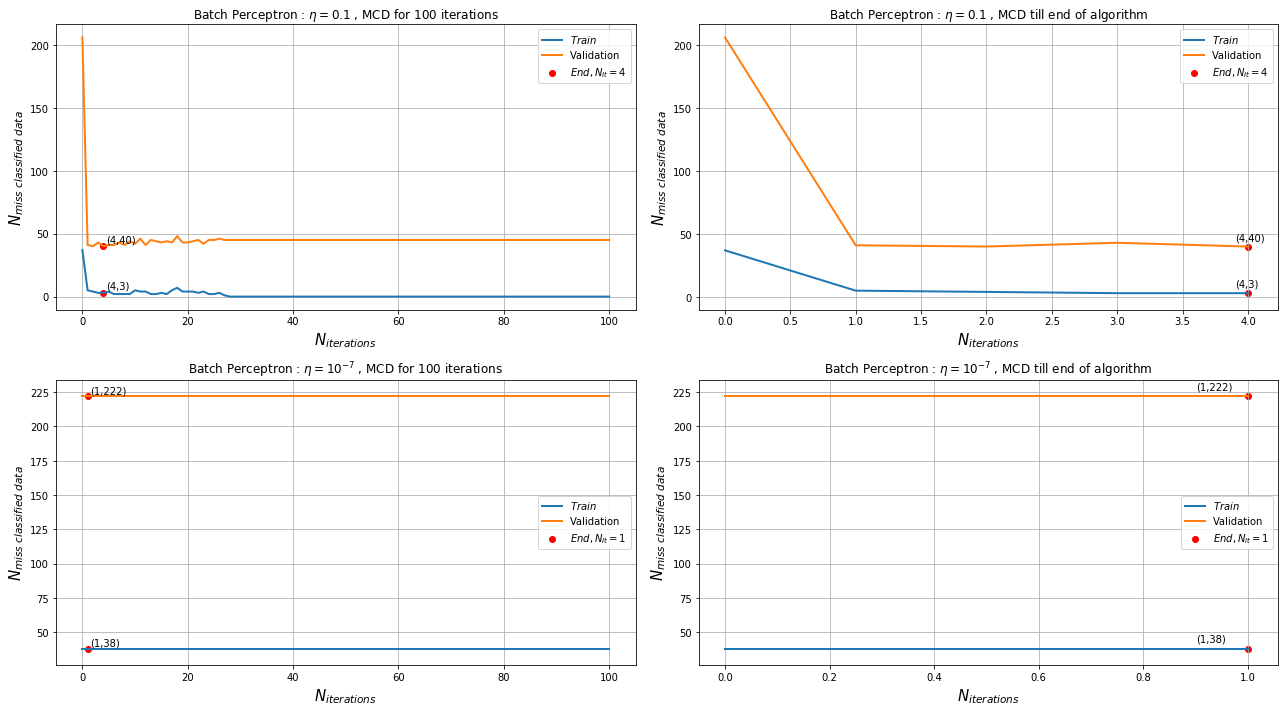

Batch Perceptron, Eta = 0.1 W : 

[[ 0.38086991 -4.48463888 -3.19691582 -4.10663034 -1.70394925  0.20329448
   0.45005827 -2.67021868  2.60599407  0.65448964]]


Batch Perceptron, Eta = 10^(-7) W : 

[[0.65811132 0.39085446 0.29019752 0.0616241  0.80578631 0.24162628
  0.73602719 0.72780076 0.05997199 0.28058242]]


In [18]:
from random import sample

def batchPerceptron(eta, Xt, Yt, Xv, Yv, Nt, Nv, d):
    # initialize a variable to store misclassified data
    nIterations = 0;
    nMissT = np.zeros(101)
    nMissV = np.zeros(101)
    # initilize matrix of perceptron weights 
    W = np.random.rand(d).reshape((d,1))
    # write iteration code  
    Ypt = np.zeros((Nt, 1))
    Ypv = np.zeros((Nv, 1))
    i = 0; 
    end = False
    for i in range(101): 
        Ypt = 2 * (np.matmul(Xt, W) >= 0) - 1
        Ypv = 2 * (np.matmul(Xv, W) >= 0) - 1
        nMissT[i] = np.sum((Yt - Ypt) != 0)
        nMissV[i] = np.sum((Yv - Ypv) != 0)
        W = W + eta * np.matmul(np.transpose(Xt), (Yt - Ypt)) # update weights
        if ((i > 0) & (nMissT[i] == nMissT[i-1]) & ~(end)) : # stop rule
            nIterations = i; 
            end = 1; 
        
    return nIterations, nMissT, nMissV, W

nI1, missT1, missV1, W1 = batchPerceptron(eta1, Xt, Yt, Xv, Yv, Nt, Nv, d)
nI2, missT2, missV2, W2 = batchPerceptron(eta2, Xt, Yt, Xv, Yv, Nt, Nv, d)

#plot 

def add_plot(plt, eta, missT, missV, nI, off1, off2, endIndex) :
    plt.plot(missT[range(endIndex + 1)], LineWidth = 2, label = "$Train$")
    plt.plot(missV[range(endIndex + 1)], LineWidth = 2, label = "Validation")
    plt.xlabel('$N_{iterations}$', fontsize = 15)
    plt.ylabel('$N_{miss \ classified \ data}$', fontsize = 15)
    if (endIndex == 100) : 
        plt.title("Batch Perceptron : $ \eta = $" + eta + " , MCD for 100 iterations")
    else :
         plt.title("Batch Perceptron : $\eta = $" + eta + " , MCD till end of algorithm")
    plt.grid(which = 'major')
    plt.scatter([nI, nI], [missT[nI], missV[nI]], color = 'red', label = 
                "$End , N_{It} = $" + str(nI))
    plt.text(nI + off1, missT[nI] + off2,"(" + str(nI) + "," + str(int(missT[nI])) + ")")
    plt.text(nI + off1, missV[nI] + off2,"(" + str(nI) + "," + str(int(missV[nI])) + ")")
    plt.legend()
    return plt

plt.figure(figsize = (18, 10))
plt.subplot(2,2,1)
plt = add_plot(plt, "0.1", missT1, missV1, nI1, 0.5, 3, 100)
plt.subplot(2,2,2)
plt = add_plot(plt, "0.1", missT1, missV1, nI1, -0.1, 5, nI1)
plt.subplot(2,2,3)
plt = add_plot(plt, "$10^{-7}$", missT2, missV2, nI2, 0.5, 2, 100)
plt.subplot(2,2,4)
plt = add_plot(plt, "$10^{-7}$", missT2, missV2, nI2, -0.1, 5, nI2)
plt.tight_layout()
plt.show()
print("Batch Perceptron, Eta = 0.1 W : \n")
print(W1.T)
print('\n')
print("Batch Perceptron, Eta = 10^(-7) W : \n")
print(W2.T)

##### Implement perceptron with online mode gradient descent

Do the same as the previous part.
Stopping rule isn't needed here. Just iterate once on training data.

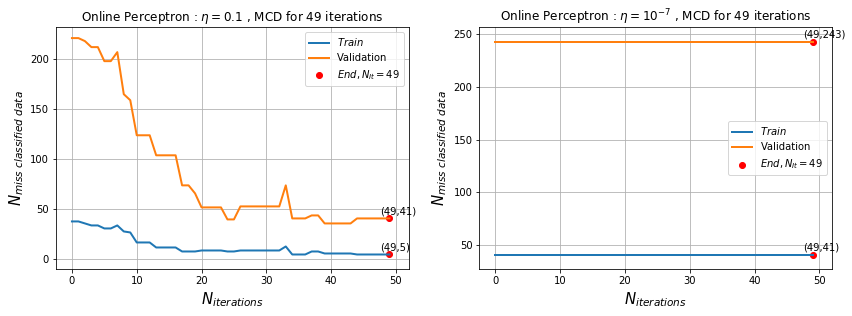

Online Perceptron, Eta = 0.1 W : 

[[ 0.66570508 -0.81781031 -0.72868558 -0.7753731  -0.65260925 -0.02491174
   0.1359705  -0.08393392  0.1072828   0.28748646]]


Online Perceptron, Eta = 10^(-7) W : 

[[0.16538009 0.90463865 0.19828963 0.18241877 0.50958764 0.12625601
  0.29598446 0.44084451 0.09710065 0.77490207]]


In [20]:
def onlinePerceptron(eta, Xt, Yt, Xv, Yv, Nt, Nv, d) :
    nMissT = np.zeros(Nt + 1)
    nMissV = np.zeros(Nt + 1)
    W = np.random.rand(d).reshape((1,d))
    nMissT[0] = np.sum((2 * (np.matmul(Xt, np.transpose(W)) >= 0) - 1 - Yt) != 0)
    nMissV[0] = np.sum((2 * (np.matmul(Xv, np.transpose(W)) >= 0) - 1 - Yv) != 0)
    for i in range(Nt) : 
        yPrime = 2 * (np.matmul(Xt[i,:], np.transpose(W)) >= 0) - 1
        W = W + eta * (Yt[i] - yPrime) * Xt[i,:]
        nMissT[i + 1] = np.sum((2 * (np.matmul(Xt, np.transpose(W)) >= 0) - 1 - Yt) != 0)
        nMissV[i + 1] = np.sum((2 * (np.matmul(Xv, np.transpose(W)) >= 0) - 1 - Yv) != 0)
    return nMissT, nMissV, W

missT1, missV1, W1 = onlinePerceptron(0.1, Xt, Yt, Xv, Yv, Nt, Nv, d)
missT2, missV2, W2 = onlinePerceptron(10 ** -7, Xt, Yt, Xv, Yv, Nt, Nv, d)

def add_plot(plt, eta, missT, missV, off1, off2, Nt) :
    plt.plot(missT, LineWidth = 2, label = "$Train$")
    plt.plot(missV, LineWidth = 2, label = "Validation")
    plt.xlabel('$N_{iterations}$', fontsize = 15)
    plt.ylabel('$N_{miss \ classified \ data}$', fontsize = 15)
    plt.title("Online Perceptron : $ \eta = $" + eta + " , MCD for 49 iterations")
    plt.grid(which = 'major')
    plt.scatter([Nt, Nt], [missT[Nt], missV[Nt]], color = 'red', label = 
                "$End , N_{It} = $" + str(Nt))
    plt.text(Nt + off1, missT[Nt] + off2,"(" + str(Nt) + "," + str(int(missT[Nt])) + ")")
    plt.text(Nt + off1, missV[Nt] + off2,"(" + str(Nt) + "," + str(int(missV[Nt])) + ")")
    plt.legend()
    return plt

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt = add_plot(plt, "0.1", missT1, missV1, -1.5, 4, Nt)
plt.subplot(2,2,2)
plt = add_plot(plt, "$10 ^ {-7}$", missT2, missV2, -1.5, 4, Nt)
plt.tight_layout()
plt.show()
print("Online Perceptron, Eta = 0.1 W : \n")
print(W1)
print('\n')
print("Online Perceptron, Eta = 10^(-7) W : \n")
print(W2)

## 2. Logistic regression

Load Iris Dataset

In [54]:
from numpy import genfromtxt
my_data = genfromtxt('Iris.csv', delimiter=',')
X = my_data[:,0:2]
Y = my_data[:,2]
Y = Y.reshape((Y.shape[0],1))

Implement the Logistic regression algorithm. You can change everything in the cell below.

In [55]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
      
    def fit (self,X,y) : 
        N = X.shape[0]
        d = X.shape[1]
        self.precision = np.zeros(self.num_iter+1) 
        X = np.concatenate((np.ones((N, 1)), X), axis = 1)
        self.W = np.zeros((d + 1, 1))
        perm = sample(range(d + 1), int(d/2))
        self.W[perm] = 1; 
        for i in range(self.num_iter) :
            p = self.predict_prob(X)
            self.precision[i+1] = np.sum((1 * (p >= 0.5)) == y) / N * 100
            grad = np.matmul(np.transpose(X), (y - p)) / (N)
            self.W = self.W - self.lr * grad
    
    def predict_prob (self ,X) :
        p = 1 / (1 + np.exp(np.matmul(X, self.W)))
        return p
        
    def predict (self, X) :
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
        yPrime =  1 * (self.predict_prob(X) >= 0.5)
        return yPrime

Note that you should plot the dataset alongside the seprator line generated by Logistic regression and for different learning rates.

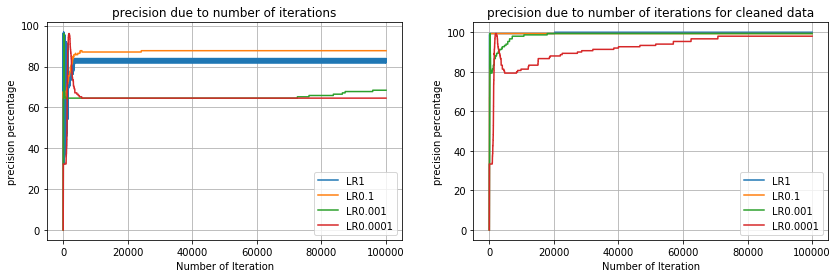

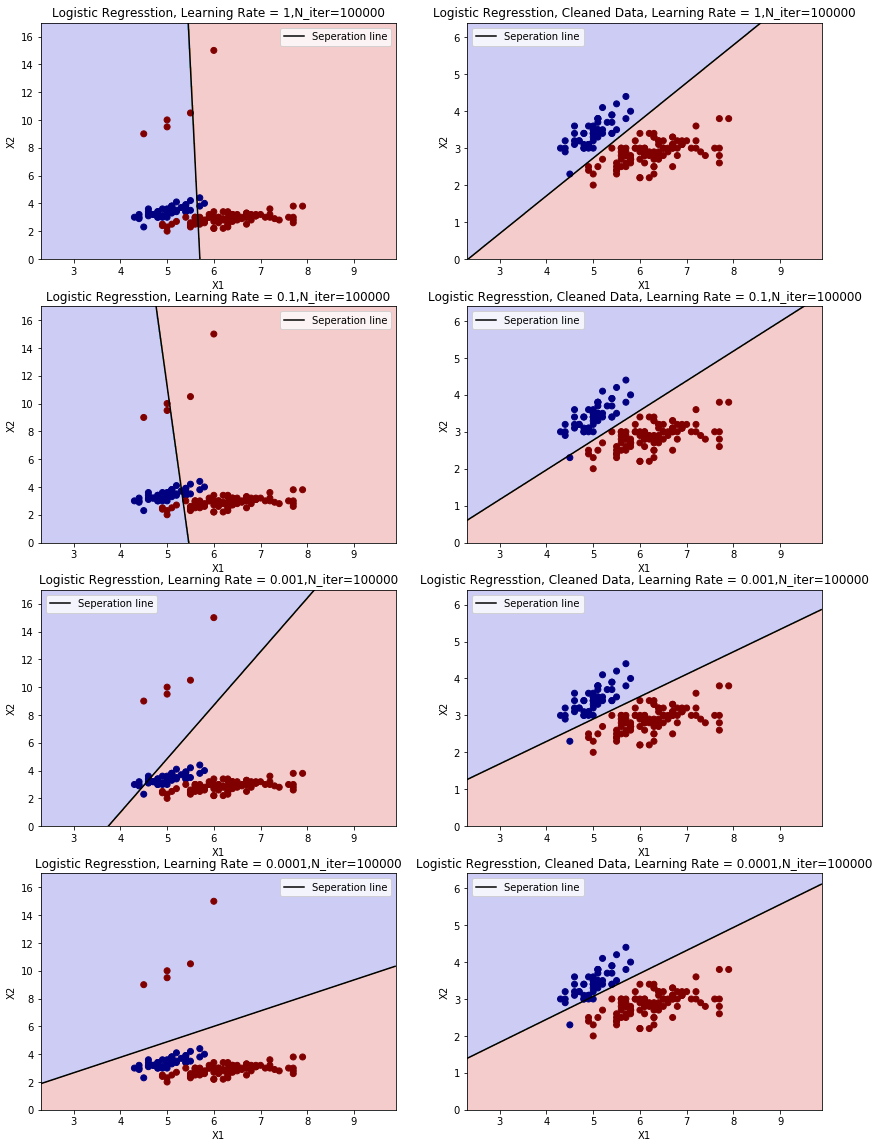

In [56]:
from matplotlib import pyplot as plt
outLayer = np.where(X[:,1] < 6)
Xcleaned = X[outLayer[0],:]
Ycleaned = Y[outLayer[0],:]

model1 = LogisticRegression(lr = 1)
model1.fit(X,Y)
model1c = LogisticRegression(lr = 1)
model1c.fit(Xcleaned ,Ycleaned)
model2 = LogisticRegression(lr = 0.1)
model2.fit(X,Y)
model2c = LogisticRegression(lr = 0.1)
model2c.fit(Xcleaned ,Ycleaned)
model3 = LogisticRegression(lr = 0.001)
model3.fit(X,Y)
model3c = LogisticRegression(lr = 0.001)
model3c.fit(Xcleaned ,Ycleaned)
model4 = LogisticRegression(lr = 10 ** (-4))
model4.fit(X,Y)
model4c = LogisticRegression(lr = 10 ** (-4))
model4c.fit(Xcleaned ,Ycleaned)
#### Plot

def myPlot(plt, model, X, Y, outLayer): 
    h = 0.02
    cmap = 'jet'
    x1Min, x1Max = X[:,0].min() - 100*h, X[:,0].max() + 100*h
    x2Min, x2Max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx1, xx2 = np.meshgrid(np.arange(x1Min, x1Max, h),
                         np.arange(x2Min, x2Max, h))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.xlim(x1Min, x1Max)
    plt.ylim(x2Min, x2Max)
    x1 = xx1[0, :]
    x2 = (- model.W[0] - model.W[1] * x1) / model.W[2]
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap = cmap)
    plt.scatter(X[:,0], X[:,1], c = Y.ravel(), cmap = cmap);
    plt.plot(x1, x2, 'black', label = 'Seperation line')
    plt.legend()
    plt.xlabel('X1')
    plt.ylabel('X2')
    if (outLayer) :
        plt.title('Logistic Regresstion, Learning Rate = ' + str(model.lr) + 
                  ',N_iter=' + str(model.num_iter))
    else :
        plt.title('Logistic Regresstion, Cleaned Data, Learning Rate = ' + str(model.lr) + 
                  ',N_iter=' + str(model.num_iter))
    return plt

plt.figure(figsize = (14,4))
plt.subplot(1, 2, 1)
plt.plot(model1.precision, label = 'LR' + str(model1.lr))
plt.plot(model2.precision, label = 'LR' + str(model2.lr))
plt.plot(model3.precision, label = 'LR' + str(model3.lr))
plt.plot(model4.precision, label = 'LR' + str(model4.lr))
plt.xlabel('Number of Iteration')
plt.ylabel('precision percentage')
plt.grid()
plt.legend()
plt.title('precision due to number of iterations')
plt.subplot(1, 2, 2)
plt.plot(model1c.precision, label = 'LR' + str(model1.lr))
plt.plot(model2c.precision, label = 'LR' + str(model2.lr))
plt.plot(model3c.precision, label = 'LR' + str(model3.lr))
plt.plot(model4c.precision, label = 'LR' + str(model4.lr))
plt.xlabel('Number of Iteration')
plt.ylabel('precision percentage')
plt.grid()
plt.legend()
plt.title('precision due to number of iterations for cleaned data')
plt.show()
plt.show()

plt.figure(figsize = (14,20))
plt.subplot(4,2,1)
plt = myPlot(plt, model1, X, Y, 1)
plt.subplot(4,2,2)
plt = myPlot(plt, model1c, Xcleaned, Ycleaned, 0)
plt.subplot(4,2,3)
plt = myPlot(plt, model2, X, Y, 1)
plt.subplot(4,2,4)
plt = myPlot(plt, model2c, Xcleaned, Ycleaned, 0)
plt.subplot(4,2,5)
plt = myPlot(plt, model3, X, Y, 1)
plt.subplot(4,2,6)
plt = myPlot(plt, model3c, Xcleaned, Ycleaned, 0)
plt.subplot(4,2,7)
plt = myPlot(plt, model4, X, Y, 1)
plt.subplot(4,2,8)
plt = myPlot(plt, model4c, Xcleaned, Ycleaned, 0)
# you can access W s by model.W
plt.show() 

## 3. Linear regression

In this part, you should impelement linear regression on Boston Housing dataset.

In [10]:
## do not edit this cell ##
### Load Dataset ###
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X=boston_dataset.data
Y=boston_dataset.target

Impelement Linear regression algorithm. You can change all the parts in the cell below.

---



In [11]:
class LinearRegression:
    
    def __init__(self, lr=0.001,num_iter = 100000, fit_intercept=True, verbose=False): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.lossTrain = np.zeros(num_iter + 1)
        self.lossTest = np.zeros(num_iter + 1)
        
    def fit (self, Xtrain, Ytrain, Xtest, Ytest) : 
        NTrain = Xtrain.shape[0]
        NTest = Xtest.shape[0]
        d = X.shape[1]
        self.W = np.zeros((d+1,1))
        Xtrain = np.concatenate((np.zeros((NTrain,1)),Xtrain), axis = 1)
        Xtest = np.concatenate((np.zeros((NTest,1)),Xtest), axis = 1)
        self.lossTrain[0] = (sum((self.predict(Xtrain) - Ytrain)**2)) / NTrain
        self.lossTest[0] = (sum((self.predict(Xtest) - Ytest)**2)) / NTest
        for i in range(self.num_iter):
            grad = (- 2 * np.matmul(Xtrain.T,Ytrain) + 2 * np.matmul(np.matmul(Xtrain.T, Xtrain), self.W)) / NTrain
            self.W = self.W - self.lr * grad
            self.lossTrain[i + 1] = (sum((self.predict(Xtrain) - Ytrain)**2)) / NTrain
            self.lossTest[i + 1] = (sum((self.predict(Xtest) - Ytest)**2)) / NTest
        self.fit_intercept = False
    
    def predict (self,X) :
        N = X.shape[0]
        if not(self.fit_intercept) :
            X = np.concatenate((np.ones((N,1)),X), axis = 1)
        yPrime = np.matmul(X, self.W)
        return yPrime

Split the dataset into the train and test part (with the proportion of 80/20), and fit the model on train data.

In [12]:
from random import sample 
import numpy as np

Y = Y.reshape((Y.shape[0],1))
N = X.shape[0]
perm = sample(range(N), N)
Xtrain = X[perm[0:int(0.8*N)]] 
Ytrain = Y[perm[0:int(0.8*N)]]
Xtest = X[perm[int(0.8*N): N]] 
Ytest = Y[perm[int(0.8*N): N]]

model1 = LinearRegression(lr = 0.00001, num_iter = 200)
model1.fit(Xtrain, Ytrain, Xtest, Ytest) 
model2 = LinearRegression(lr = 0.000001)
model2.fit(Xtrain, Ytrain, Xtest, Ytest)
model3 = LinearRegression(lr = 0.0000001)
model3.fit(Xtrain, Ytrain, Xtest, Ytest)
model4 = LinearRegression(lr = 0.00000001)
model4.fit(Xtrain, Ytrain, Xtest, Ytest)

Plot the loss function versus iterations for both the train and test data and for different learning rates.

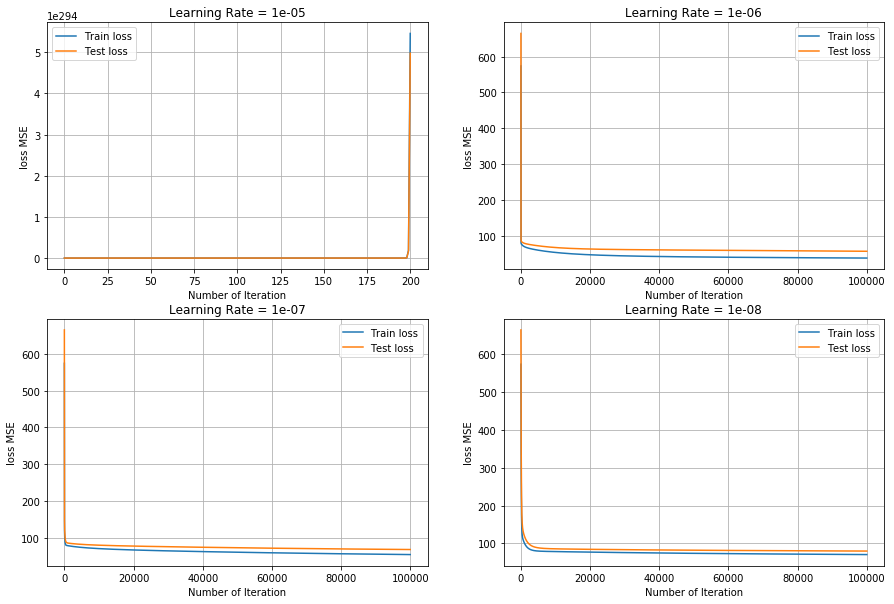

In [13]:
from matplotlib import pyplot as plt

def myPlot2(plt, model) :
    plt.plot(model.lossTrain, label = 'Train loss')
    plt.plot(model.lossTest, label = 'Test loss')
    plt.xlabel('Number of Iteration')
    plt.ylabel('loss MSE')
    plt.grid()
    plt.legend()
    plt.title('Learning Rate = ' + str(model.lr))
    return plt

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt = myPlot2(plt, model1)
plt.subplot(2,2,2)
plt = myPlot2(plt, model2)
plt.subplot(2,2,3)
plt = myPlot2(plt, model3)
plt.subplot(2,2,4)
plt = myPlot2(plt, model4)
plt.show()